In [1]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.describe()
#count : 결측값이 아닌 데이터 수
#mean : 평균값
#std : 분산 (퍼짐정도)
#min : 최소값
#25% : 하위 25%에 해당하는 값
#50% : 중간값
#75 % : 상위 25%에 해당하는 값
#max : 최대값

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


Age(나이)의 결측치는 중앙값으로, Embarked(승선 항구)의 결측치는 최빈값으로 대체해주세요. 모두 대체한 후에, 대체 결과를 isnull() 함수와 sum()  함수를 이용해서 확인해주세요. 

In [5]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])

print(titanic['age'].isnull().sum())
print(titanic['embarked'].isnull().sum())

0
0


수치형으로 인코딩

In [6]:
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['alive'] = titanic['alive'].map({'no': 1, 'yes': 0})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2,})

print(titanic['sex'].head())
print(titanic['alive'].head())
print(titanic['embarked'].head())

0    0
1    1
2    1
3    1
4    0
Name: sex, dtype: int64
0    1
1    0
2    0
3    0
4    1
Name: alive, dtype: int64
0    2
1    0
2    2
3    2
4    2
Name: embarked, dtype: int64


**새로운 feature 생성**

SibSip(타이타닉호에 동승한 자매 및 배우자의 수), Parch(타이타닉호에 동승한 부모 및 자식의 수)를 통해서 family_size(가족크기)를 생성해주세요. 새로운 feature를 `head` 함수를 이용해 확인해주세요.

In [7]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

print(titanic['family_size'].head())

0    2
1    2
2    1
3    2
4    1
Name: family_size, dtype: int64


In [8]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,0,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,1,False,2
1,1,1,1,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,0,False,2
2,1,3,1,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,0,True,1
3,1,1,1,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,0,False,2
4,0,3,0,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,1,True,1


4. **모델 학습시키기 (Logistic Regression, Random Forest, XGBoost)**
    
    4-1. 모델 학습 준비 
    
    이제 모델을 학습시키기 위한 데이터를 준비하겠습니다. 학습에 필요한 feature은 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', ‘family_size’ 입니다. feature과 target을 분리해주세요.  그 다음 데이터 스케일링을 진행해주세요.

In [9]:
titanic = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'family_size']]
X = titanic.drop('survived', axis=1) # feature
y = titanic['survived'] # target

이제 Logistic Regression, Random Forest, XGBoost를 통해서 생존자를 예측하는 모델을 학습하세요. 학습이 끝난 뒤 Logistic Regression과 Random Forest는 모델 accuracy를 통해, XGBoost는 mean squared error를 통해 test data를 예측하세요. 

## Logistic Regression

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split # 훈련세트 만들기
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 라이브러리
from sklearn.preprocessing import StandardScaler # 스케일링 라이브러리
from sklearn.metrics import accuracy_score, classification_report # 모델 평가 라이브러리

In [11]:

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 생성 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.8044692737430168
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



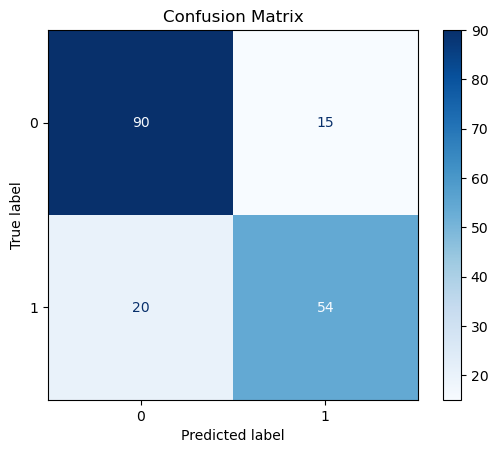

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Confusion Matrix 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


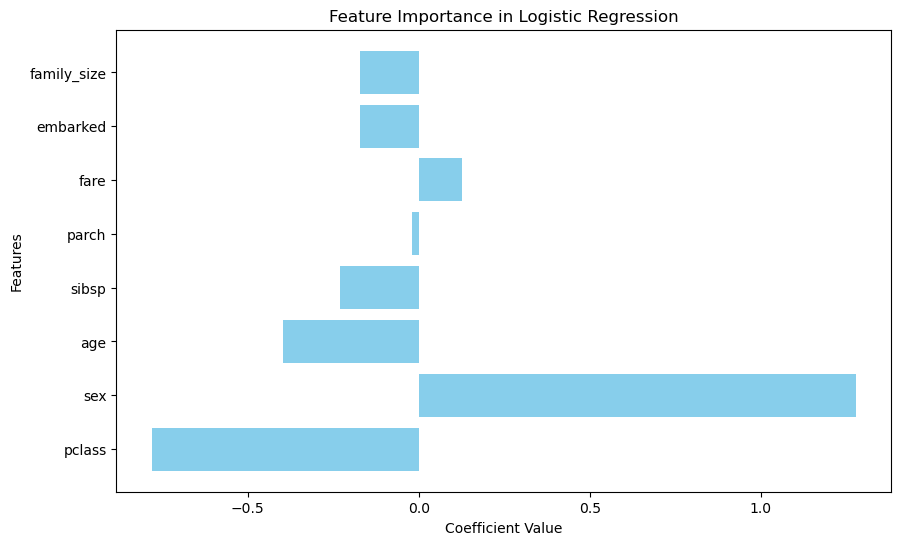

In [13]:
# 특성 중요도(회귀 계수) 시각화
feature_importance = model.coef_[0]  # 로지스틱 회귀 모델의 계수
features = X.columns

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance in Logistic Regression')
plt.show()


## Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 생성 및 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.770949720670391
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.80       105
           1       0.70      0.78      0.74        74

    accuracy                           0.77       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.77      0.77       179



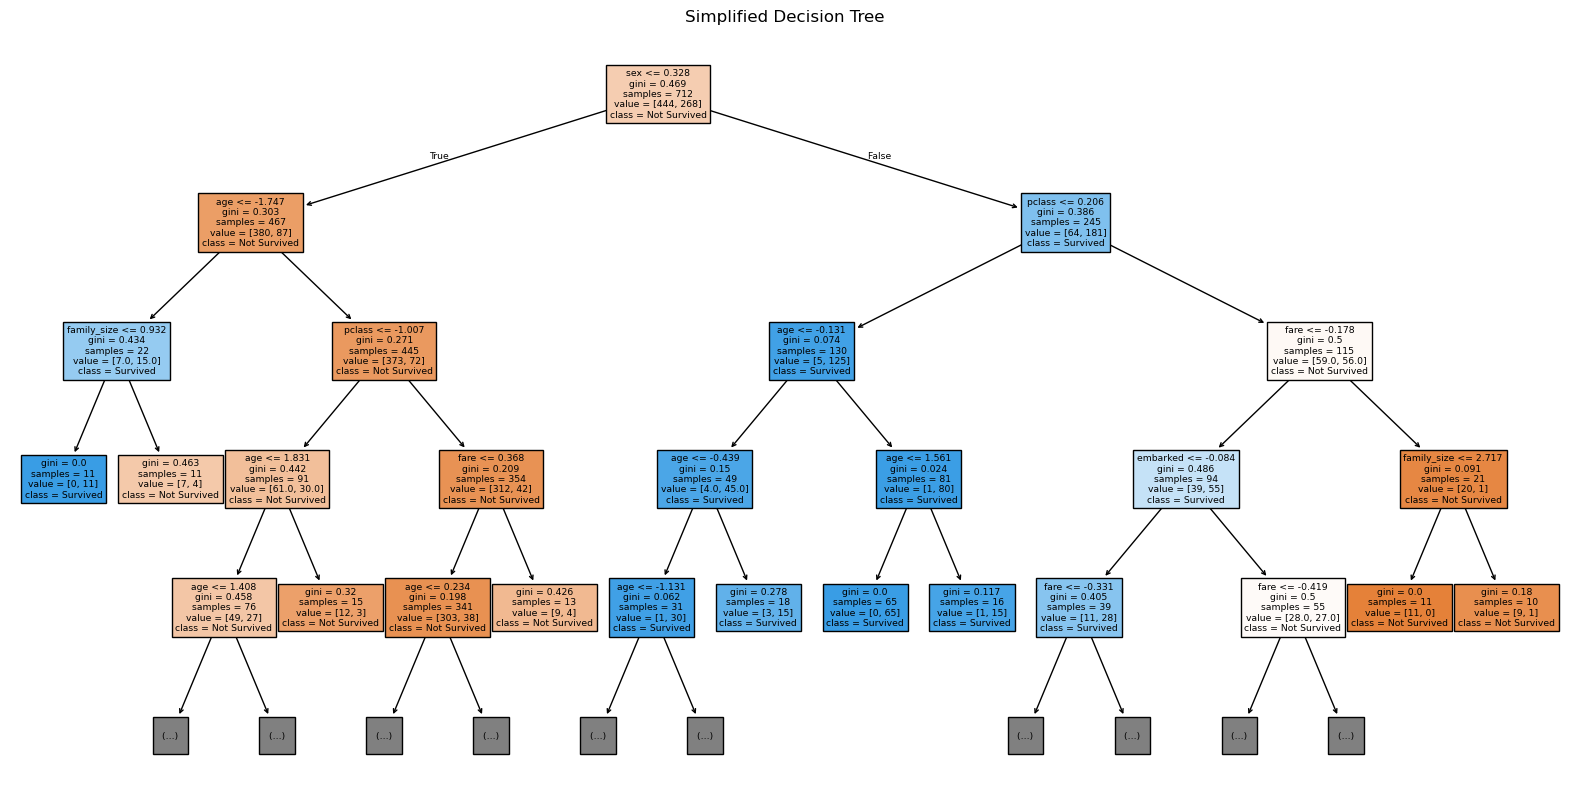

In [15]:
from sklearn.tree import plot_tree

# min_samples_split, min_samples_leaf로 모델 제약하기
model = DecisionTreeClassifier(random_state=42, min_samples_split=20, min_samples_leaf=10)
model.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], max_depth=4)
plt.title('Simplified Decision Tree')
plt.show()



## Random forest

In [25]:
# random forest 모델 생성 및 학습 (무작위성 추가)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(
    random_state=42,
    max_features="sqrt",  # 각 노드 분할 시 사용할 특성 수 제한(제곱근) 특성 수가 많을 때 사용하면 무작위성이 증가함
    max_samples=0.5,      # 각 트리가 학습할 데이터 샘플 비율 제한
    bootstrap=True,       # 부트스트랩 샘플링 활성화
    n_estimators=100
)

model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.8212290502793296
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



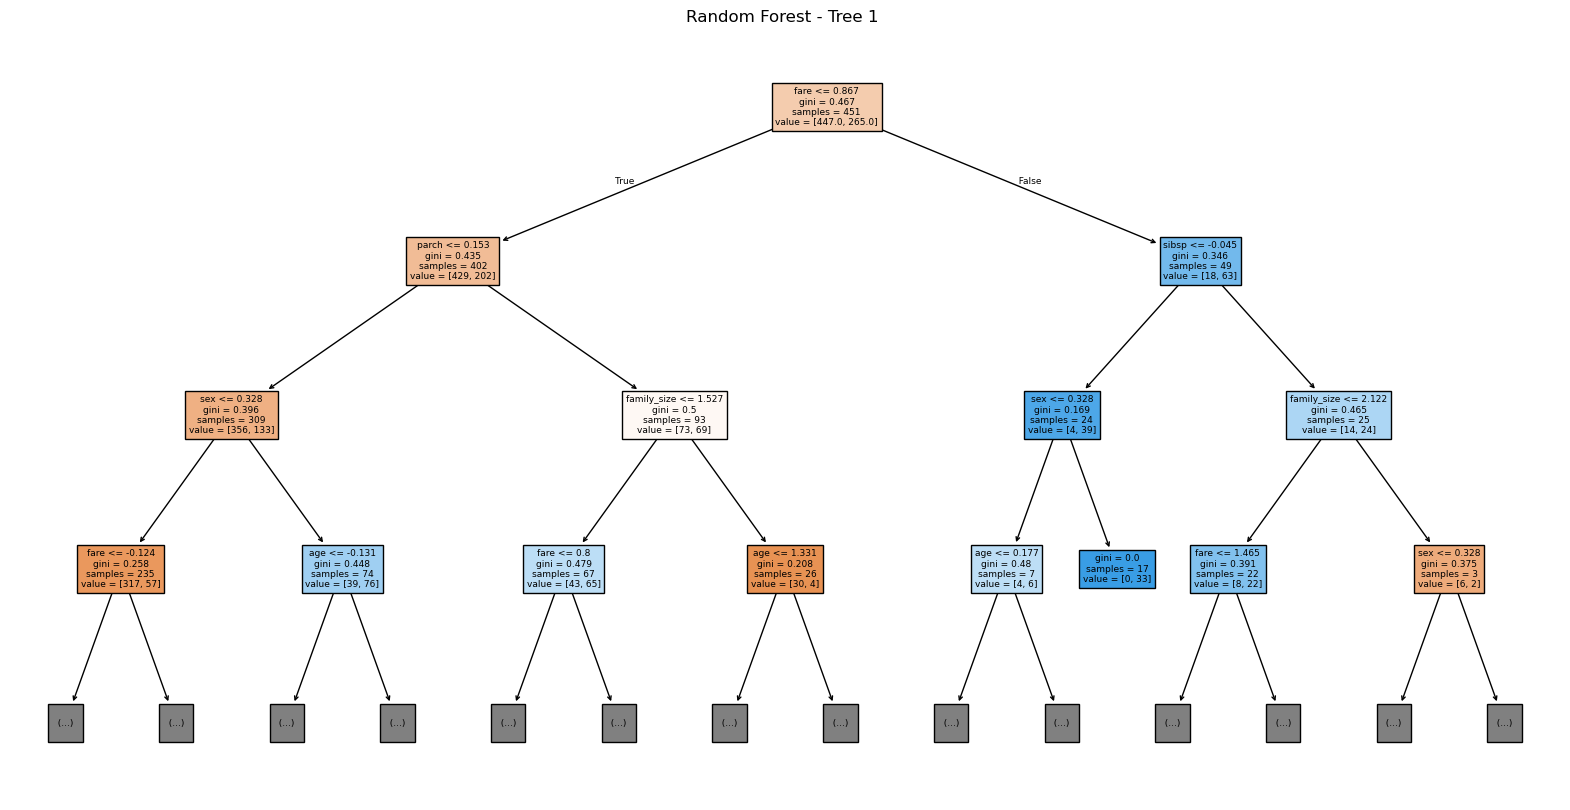

In [28]:
from sklearn.tree import plot_tree

# 첫 번째 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], filled=True, max_depth=3, feature_names=X.columns)
plt.title("Random Forest - Tree 1")
plt.show()

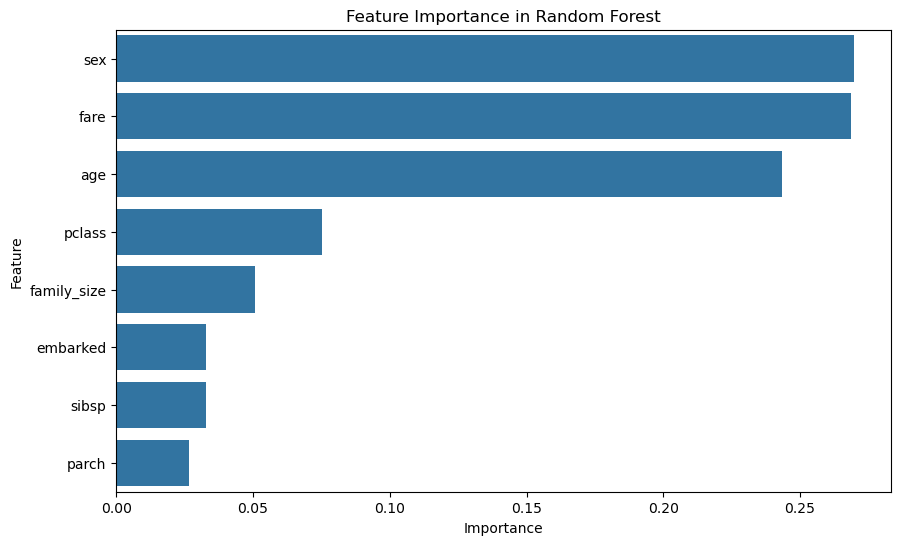

In [31]:
# 특성 중요도 시각화
feature_importances = model.feature_importances_
features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features = features.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features)
plt.title('Feature Importance in Random Forest')
plt.show()



## XGBoost

In [32]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost 모델 생성
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 모델 학습
xgb_model.fit(X_train_scaled, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test_scaled)

# 평가
mse_xgb = mean_squared_error(y_test, y_pred_xgb) # 잔차 제곱의 평균/ 작은 값일수록 실제 값과 가까움

print(f'XGBoost 모델의 MSE: {mse_xgb}')

XGBoost 모델의 MSE: 0.12981004899201257


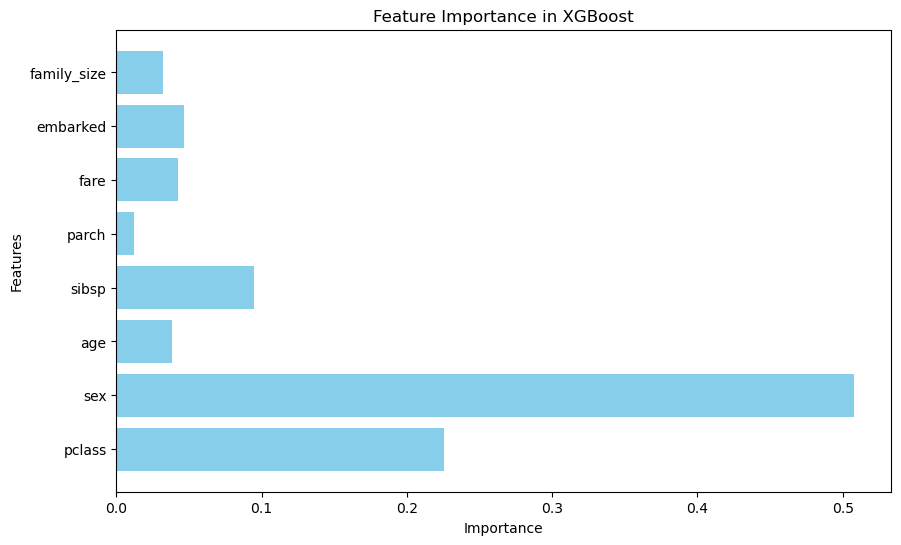

In [33]:
# feature_importances_: XGBoost 모델이 예측을 수행하는 데 얼마나 많은 정보를 각 특성에서 얻는지를 나타낸다.
# 특성 중요도 추출
feature_importance = xgb_model.feature_importances_
features = X.columns


# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in XGBoost')
plt.show()
